测试R语言重抽样和Bootstrap

# coin包置换检验

## 独立两样本和K样本检验

In [15]:
library(coin)
score <- c(40, 57, 45, 55, 58, 57, 64, 55, 62, 65)
treatment <- factor(c(rep("A", 5), rep("B", 5)))

In [16]:
mydata <- data.frame(treatment, score)

In [20]:
# t检验
t.test(
  score~treatment,
  data=mydata,
  var.equal=TRUE
)


	Two Sample t-test

data:  score by treatment
t = -2.345, df = 8, p-value = 0.04705
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -19.0405455  -0.1594545
sample estimates:
mean in group A mean in group B 
           51.0            60.6 


In [23]:
oneway.test(
    score~treatment,
    data=mydata,
)


	One-way analysis of means (not assuming equal variances)

data:  score and treatment
F = 5.4988, num df = 1.0000, denom df = 6.1971, p-value = 0.05611


In [14]:
library(MASS)
UScrime  <- transform(
    UScrime,
    So=factor(So)
)

wilcox.test(
    Prob~So,
    data=UScrime,
    distribution="exact"
)


	Wilcoxon rank sum exact test

data:  Prob by So
W = 81, p-value = 8.488e-05
alternative hypothesis: true location shift is not equal to 0


In [27]:
library(multcomp)
set.seed(1234)

oneway_test(
    response~trt,
    data=cholesterol,
    distribution=approximate(nresample=9999)
)


	Approximative K-Sample Fisher-Pitman Permutation Test

data:  response by
	 trt (1time, 2times, 4times, drugD, drugE)
chi-squared = 36.381, p-value < 1e-04


## 联列表的独立性

In [29]:
library(coin)
library(vcd)

Loading required package: grid



In [31]:
Arthritis  <- transform(
    Arthritis,
    Improved=factor(as.numeric(Improved))
)

Arthritis

,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<fct>
1,57,Treated,Male,27,2
2,46,Treated,Male,29,1
3,77,Treated,Male,30,1
4,17,Treated,Male,32,3
5,36,Treated,Male,46,3
6,23,Treated,Male,58,3
7,75,Treated,Male,59,1
8,39,Treated,Male,59,3
9,33,Treated,Male,63,1


In [32]:
set.seed(1234)
chisq_test(Treatment~Improved, data=Arthritis)


	Asymptotic Pearson Chi-Squared Test

data:  Treatment by Improved (1, 2, 3)
chi-squared = 13.055, df = 2, p-value = 0.001463


## 数值变量间的独立性

In [35]:
states <- as.data.frame(state.x77)
set.seed(1234)
spearman_test(Illiteracy~Murder, data=states)


	Asymptotic Spearman Correlation Test

data:  Illiteracy by Murder
Z = 4.7065, p-value = 2.52e-06
alternative hypothesis: true rho is not equal to 0


## 两样本和K样本相关性检验

In [36]:
library(coin)
library(MASS)

wilcoxsign_test(U1~U2, data=UScrime, distribution="exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = 5.9691, p-value = 1.421e-14
alternative hypothesis: true mu is not equal to 0


# lmPerm包的置换检验

## 简单回归和多项式回归

In [40]:
library(lmPerm)
set.seed(1234)
fit <- lmp(weight~height, data=women, perm="Prob")
summary(fit)

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = weight ~ height, data = women, perm = "Prob")

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 136.73333    0.39375  347.25  < 2e-16 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [41]:
library(lmPerm)
set.seed(1234)
fit <- lmp(weight~height+I(height^2), data=women, perm="Prob")
summary(fit)

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = weight ~ height + I(height^2), data = women, perm = "Prob")

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 136.73333    0.09917 1378.845  < 2e-16 ***
height       -7.34832    0.77769   -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598   13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


## 多元回归

In [42]:
library(lmPerm)

set.seed(1234)

states <- as.data.frame(state.x77)
fit <- lmp(Murder~Population+Illiteracy+Income+Frost, data=states, perm="Prob")
summary(fit)

[1] "Settings:  unique SS : numeric variables centered"



Call:
lmp(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states, perm = "Prob")

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.378e+00  3.585e-01  20.580  < 2e-16 ***
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


## 单因素方差分析和协方差分析

In [43]:
library(lmPerm)
library(multcomp)
set.seed(1234)

fit <- aovp(response~trt, data=cholesterol, perm="Prob")
anova(fit)

[1] "Settings:  unique SS "


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
trt,4,1351.3690,337.84225,32.43283,9.818516e-13
Residuals,45,468.7504,10.41668,NA,NA


In [44]:
library(lmPerm)
set.seed(1234)

fit <- aovp(weight~gesttime+dose, data=litter,perm="Prob")
anova(fit)

[1] "Settings:  unique SS : numeric variables centered"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
gesttime,1,161.4931,161.49310,9.678882,0.002710403
dose,3,137.1229,45.70763,2.739428,0.049883011
Residuals,69,1151.2718,16.68510,NA,NA


## 双因素方差分析

In [45]:
library(lmPerm)
set.seed(1234)

fit <- aovp(len~supp*dose, data=ToothGrowth, perm="Prob")
anova(fit)

[1] "Settings:  unique SS : numeric variables centered"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
supp,1,205.35000,205.35000,12.317020,8.936452e-04
dose,1,2224.30430,2224.30430,133.415146,1.907985e-16
supp:dose,1,88.92011,88.92011,5.333483,2.463136e-02
Residuals,56,933.63493,16.67205,NA,NA


# Bootstrap

## 单个统计量的自助法

In [46]:
install.packages("boot")

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\RtmpMtShbt\downloaded_packages


In [47]:
rsq <- function(formula, data, indices){
    d <- data[indices,]
    fit <- lm(formula, data=d)
    return(summary(fit)$r.squared)
}

In [48]:
library(boot)
set.seed(1234)
result <- boot(
    data=mtcars,
    statistic=rsq,
    R=1000,
    formula=mpg~wt+disp
)


Attaching package: 'boot'


The following object is masked from 'package:survival':

    aml




In [49]:
print(result)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mtcars, statistic = rsq, R = 1000, formula = mpg ~ 
    wt + disp)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.7809306 0.01379126  0.05113904


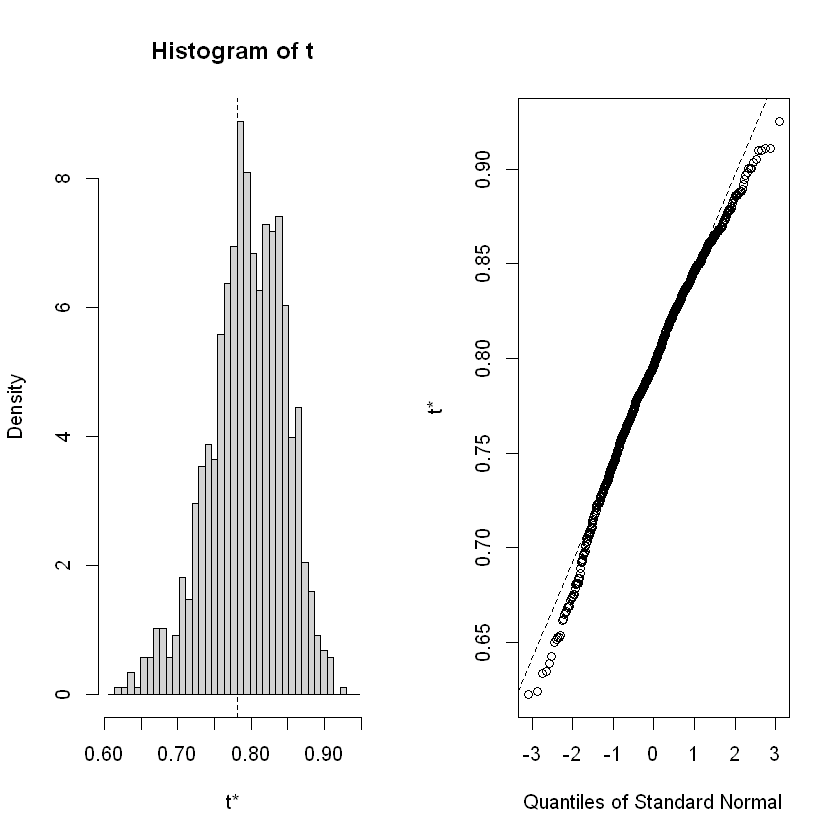

In [51]:
plot(result)

In [52]:
boot.ci(result, type=c("perc", "bca"))

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result, type = c("perc", "bca"))

Intervals : 
Level     Percentile            BCa          
95%   ( 0.6753,  0.8835 )   ( 0.6344,  0.8561 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

In [53]:
boot.ci(result)

Warning message in boot.ci(result):
"bootstrap variances needed for studentized intervals"


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result)

Intervals : 
Level      Normal              Basic         
95%   ( 0.6669,  0.8674 )   ( 0.6784,  0.8866 )  

Level     Percentile            BCa          
95%   ( 0.6753,  0.8835 )   ( 0.6344,  0.8561 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

## 多个统计量的自助法

In [56]:
bs <- function(formula, data, indices){
    d <- data[indices,]
    fit <- lm(formula, data=d)
    return(coef(fit))
}

In [58]:
library(boot)
set.seed(1234)
result <- boot(
    data=mtcars,
    statistic=bs,
    R=1000,
    formula=mpg~wt+disp
)
print(result)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = mtcars, statistic = bs, R = 1000, formula = mpg ~ 
    wt + disp)


Bootstrap Statistics :
       original        bias    std. error
t1* 34.96055404  4.715497e-02 2.546106756
t2* -3.35082533 -4.908125e-02 1.154800744
t3* -0.01772474  6.230927e-05 0.008518022


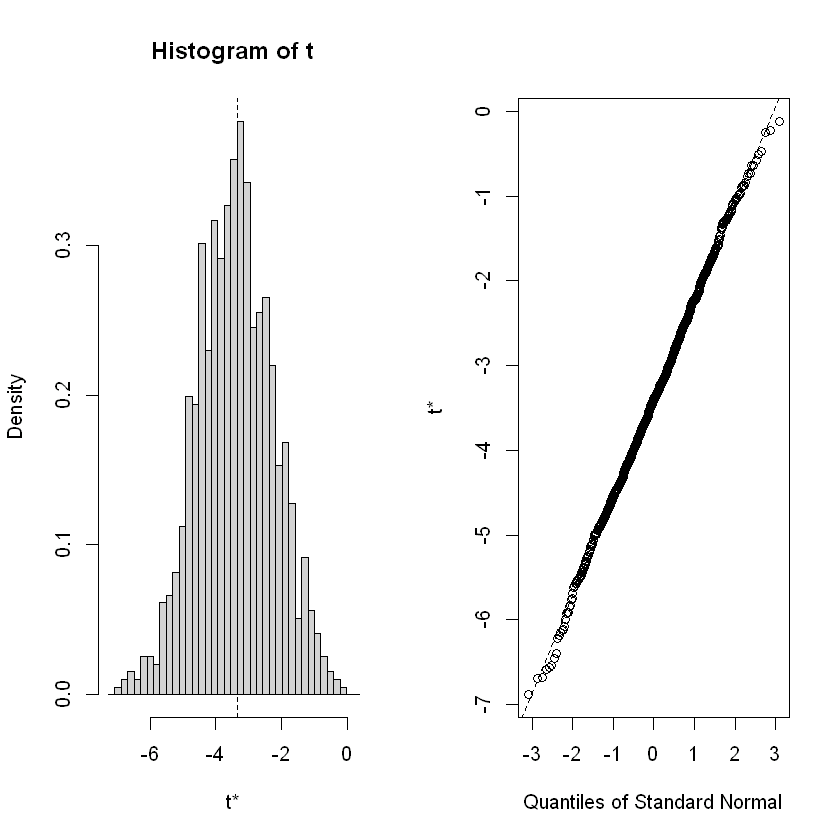

In [59]:
plot(result, index=2)

In [60]:
boot.ci(result, type="bca", index=2)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result, type = "bca", index = 2)

Intervals : 
Level       BCa          
95%   (-5.477, -0.937 )  
Calculations and Intervals on Original Scale

In [61]:
boot.ci(result, type="bca", index=3)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result, type = "bca", index = 3)

Intervals : 
Level       BCa          
95%   (-0.0334, -0.0011 )  
Calculations and Intervals on Original Scale